Model Accuracy: 0.9766081871345029
Confusion Matrix:
 [[ 61   2]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

ROC-AUC: 0.9976484420928865


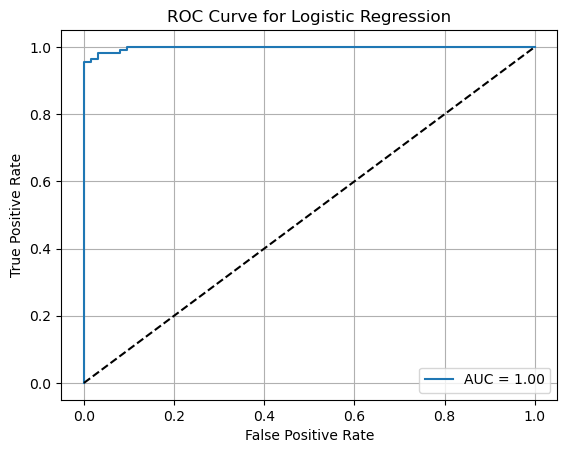

In [ ]:
# TASK 5
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(features, labels, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_set, y_train_set)

predictions = log_reg.predict(X_test_set)
probabilities = log_reg.predict_proba(X_test_set)[:, 1]

print("Model Accuracy:", accuracy_score(y_test_set, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test_set, predictions))
print("Classification Report:\n", classification_report(y_test_set, predictions))
print("ROC-AUC:", roc_auc_score(y_test_set, probabilities))

fpr_vals, tpr_vals, _ = roc_curve(y_test_set, probabilities)
plt.plot(fpr_vals, tpr_vals, label=f'AUC = {roc_auc_score(y_test_set, probabilities):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


Results for Different Thresholds:

Threshold: 0.3
Confusion Matrix:
[[ 59   4]
 [  2 106]]
F1 Score: 0.97

Threshold: 0.5
Confusion Matrix:
[[ 61   2]
 [  2 106]]
F1 Score: 0.98

Threshold: 0.7
Confusion Matrix:
[[ 62   1]
 [  4 104]]
F1 Score: 0.98


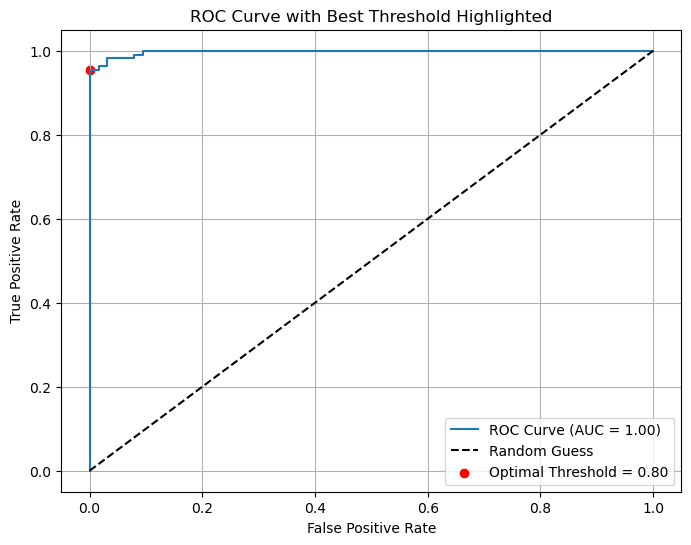

In [ ]:
# TASK 6
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

probs = clf.predict_proba(X_test)[:, 1]

cutoffs = [0.3, 0.5, 0.7]
print("Results for Different Thresholds:")
for cut in cutoffs:
    preds = (probs >= cut).astype(int)
    cmatrix = confusion_matrix(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"\nThreshold: {cut}")
    print("Confusion Matrix:")
    print(cmatrix)
    print(f"F1 Score: {f1:.2f}")

fpr_vals, tpr_vals, thresholds_roc = roc_curve(y_test, probs)
j_stat = tpr_vals - fpr_vals
best_idx = np.argmax(j_stat)
best_threshold = thresholds_roc[best_idx]

plt.figure(figsize=(8, 6))
plt.plot(fpr_vals, tpr_vals, label=f'ROC Curve (AUC = {roc_auc_score(y_test, probs):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')
plt.scatter(fpr_vals[best_idx], tpr_vals[best_idx], color='red', label=f'Optimal Threshold = {best_threshold:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Best Threshold Highlighted")
plt.legend()
plt.grid(True)
plt.show()


Model Accuracy: 1.0

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



c:\Users\Krishna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


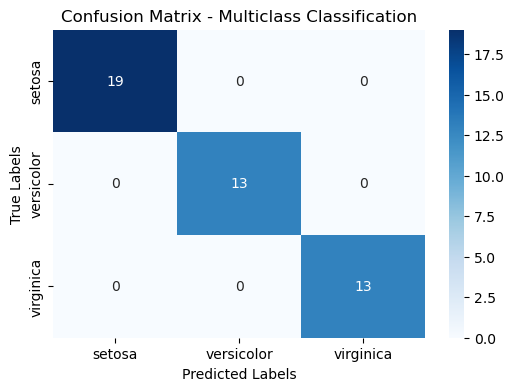

In [ ]:
# TASK 7
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = load_iris()
features = iris_data.data
labels = iris_data.target
class_names = iris_data.target_names

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, predictions))
print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions, target_names=class_names))

cmatrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cmatrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Multiclass Classification")
plt.show()
